In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sebastianwillmann/beverage-sales")

print("Path to dataset files:", path)


100%|██████████| 119M/119M [00:02<00:00, 46.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sebastianwillmann/beverage-sales/versions/1


In [ ]:
Ваши задачи следующие:
1. Проанализировать данные, которые вам попались. Какие выводы можно сделать только из анализа? Проведите визуальный и статический анализ, опишите ваши находки.
2. Определите, какое моделирование доступно для ваших данных. Какие есть в них связи?
3. Опишите возможные верхнеуровневые задачи, которые можно решать с помощью таких данных.
4. Очистите и обработайте данные. Опишите, какие в них были проблемы.
4. Постройте подходящую предсказательную модель. Обоснуйте ее выбор.
5. Выберите и обоснуйте метрики для ее оценки. Покажите, как модель работает на данных, которые не видела при обучении.
6. Представьте, что решаете реальную бизнес-задачу. Как вы могли бы использовать вашу модель? Какие бизнес-метрики могли бы быть использованы для ее контроля?

В этом задании вам нужно вспомнить материалы прошлого курса.
При этом у вас есть возможность свободно использовать LLM-ботов и внешние данные.

Важно! Предоставьте все переписки с ботами, данные и внешние источники, использовавшиеся для решения задачи.

Хотя вы можете пользоваться чем угодно, ваш балл будет зависеть от качества и оригинальности решения.
Более продуманная работа, выполненная с помощью LLM, будет оценена выше полностью рукотворной, но базовой.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_t = pd.read_csv("/kaggle/input/beverage-sales/synthetic_beverage_sales_data.csv")

Распределение типов клиентов по регионам (%): Customer_Type            B2B   B2C
Region                            
Baden-Württemberg       34.4  65.6
Bayern                  34.8  65.2
Berlin                  36.5  63.5
Brandenburg             35.8  64.2
Bremen                  35.8  64.2
Hamburg                 37.0  63.0
Hessen                  39.8  60.2
Mecklenburg-Vorpommern  38.4  61.6
Niedersachsen           32.3  67.7
Nordrhein-Westfalen     34.0  66.0
Rheinland-Pfalz         36.5  63.5
Saarland                37.7  62.3
Sachsen                 33.1  66.9
Sachsen-Anhalt          35.2  64.8
Schleswig-Holstein      32.8  67.2
Thüringen               35.8  64.2


<Figure size 1000x600 with 0 Axes>

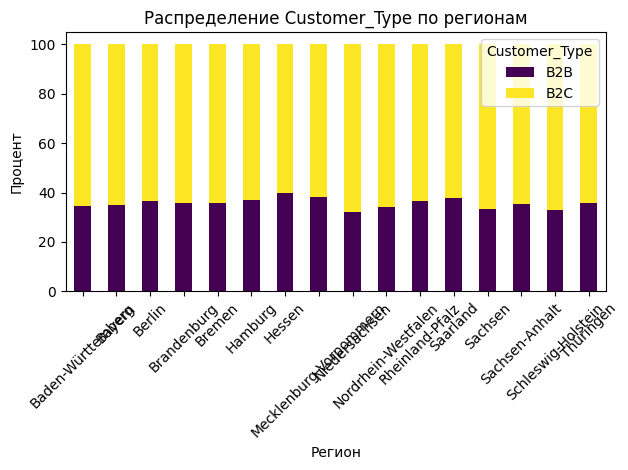

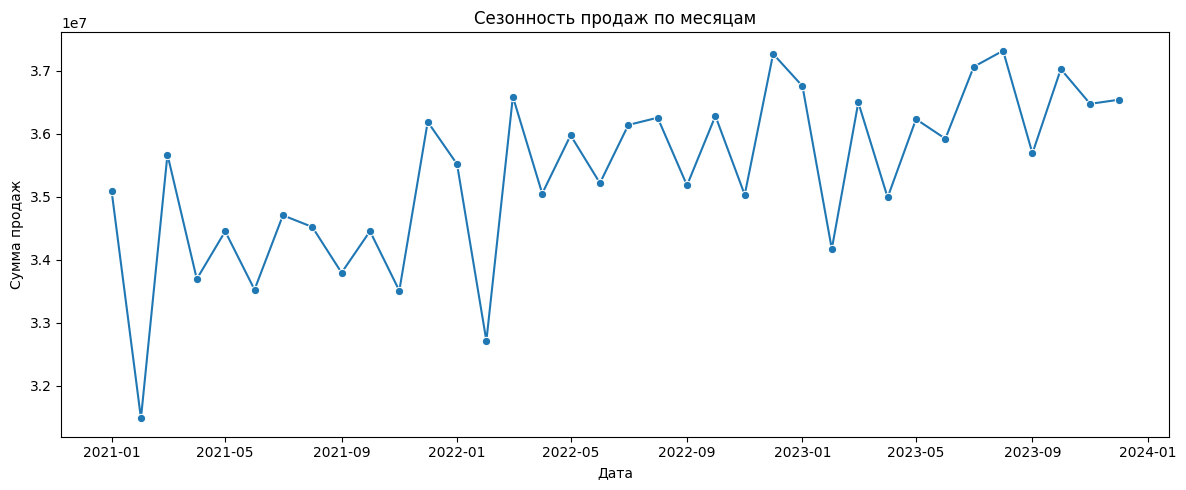

Топ-10 продуктов по продажам: Product
Veuve Clicquot     2.173334e+08
Moët & Chandon     1.900732e+08
Johnnie Walker     1.053523e+08
Jack Daniels       1.029206e+08
Tanqueray          9.314768e+07
Bacardi            6.385058e+07
Havana Club        6.344963e+07
Sauvignon Blanc    2.526018e+07
Cranberry Juice    2.485643e+07
Riesling           2.479868e+07
Name: Sales, dtype: float64


<ipython-input-56-daed3846d86b>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='mako')


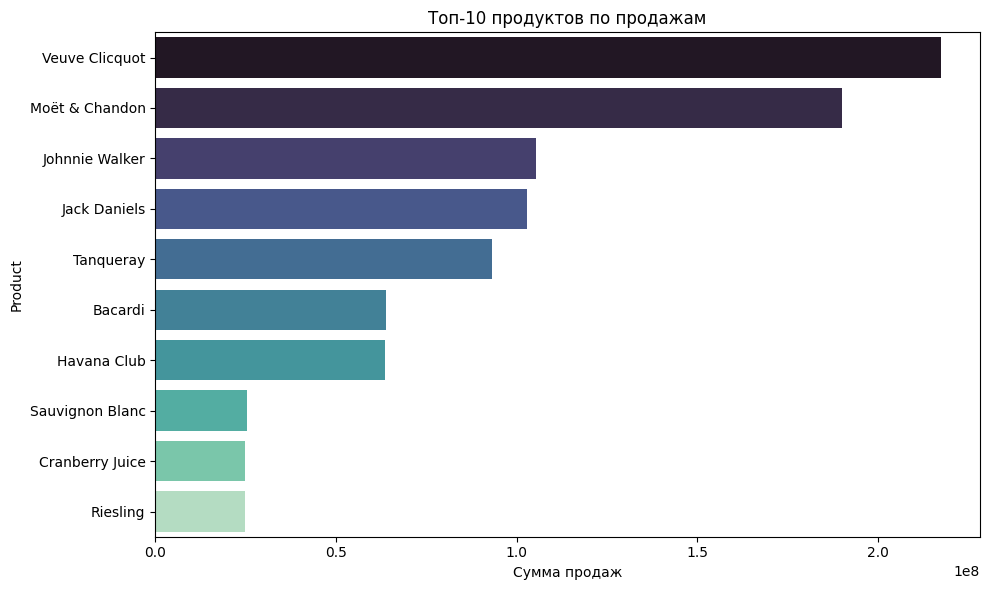

Продажи по категориям: Category
Alcoholic Beverages    9.865641e+08
Juices                 1.439701e+08
Soft Drinks            8.962834e+07
Water                  5.292920e+07
Name: Sales, dtype: float64


<ipython-input-56-daed3846d86b>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='crest')


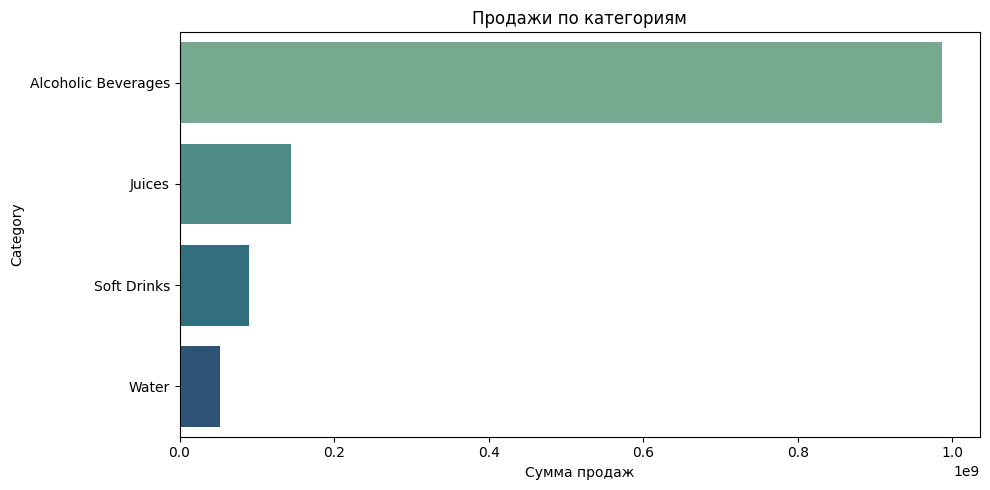

Категории с наибольшим количеством проданных единиц: Category
Alcoholic Beverages    52109641
Water                  52080896
Juices                 52046874
Soft Drinks            52003710
Name: Quantity, dtype: int64


<ipython-input-56-daed3846d86b>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_quantity.values, y=category_quantity.index, palette='flare')


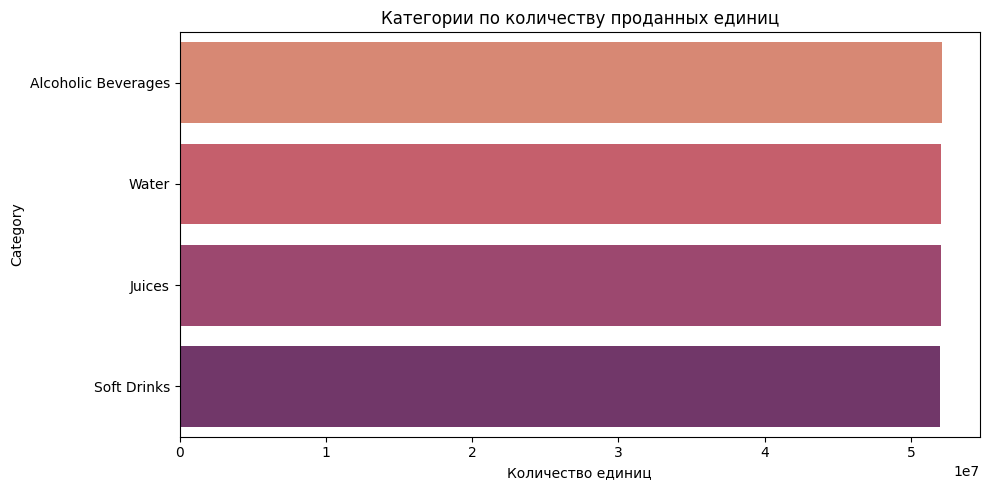

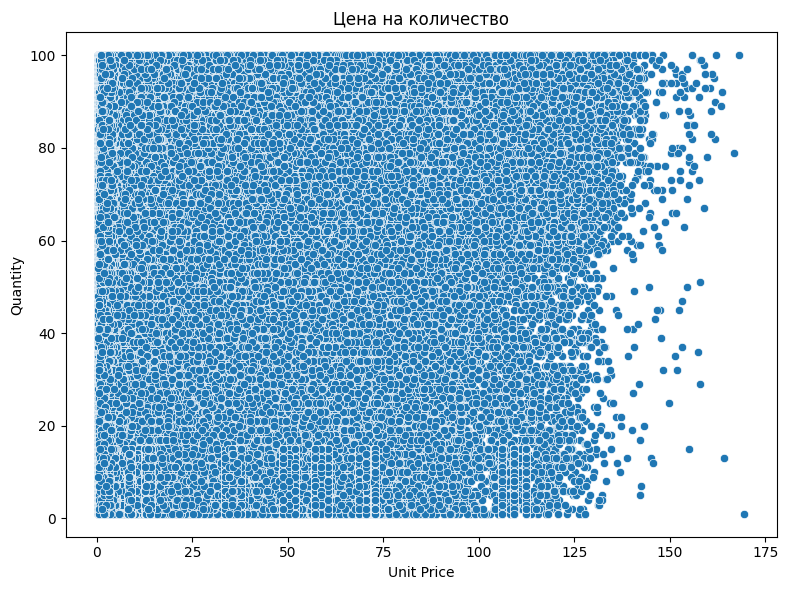

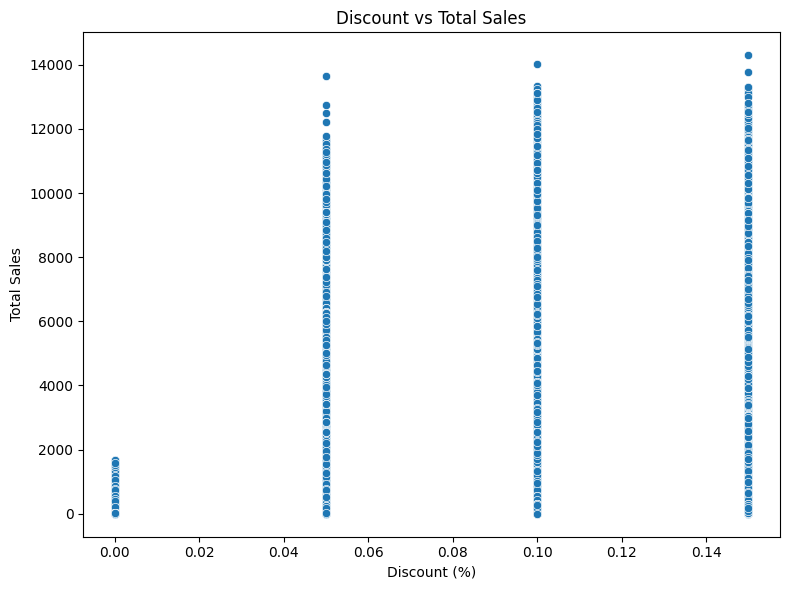

In [ ]:
df = X_t
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Sales'] = df['Unit_Price'] * df['Quantity']

region_cust = df.groupby(['Region', 'Customer_Type']).size().unstack().fillna(0)
region_cust_percent = region_cust.div(region_cust.sum(axis=1), axis=0) * 100
print("Распределение типов клиентов по регионам (%):", region_cust_percent.round(1))

plt.figure(figsize=(10, 6))
region_cust_percent.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Распределение Customer_Type по регионам")
plt.ylabel("Процент")
plt.xlabel("Регион")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


df['Month'] = df['Order_Date'].dt.month
df['Year'] = df['Order_Date'].dt.year
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='Sales', data=monthly_sales, marker='o')
plt.title("Сезонность продаж по месяцам")
plt.xlabel("Дата")
plt.ylabel("Сумма продаж")
plt.tight_layout()
plt.show()



top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)
print("Топ-10 продуктов по продажам:", top_products)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette='mako')
plt.title("Топ-10 продуктов по продажам")
plt.xlabel("Сумма продаж")
plt.tight_layout()
plt.show()


top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Продажи по категориям:", top_categories)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='crest')
plt.title("Продажи по категориям")
plt.xlabel("Сумма продаж")
plt.tight_layout()
plt.show()


category_quantity = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print("Категории с наибольшим количеством проданных единиц:", category_quantity)

plt.figure(figsize=(10, 5))
sns.barplot(x=category_quantity.values, y=category_quantity.index, palette='flare')
plt.title("Категории по количеству проданных единиц")
plt.xlabel("Количество единиц")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unit_Price', y='Quantity', data=df)
plt.title('Цена на количество')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Total_Price', data=df)
plt.title('Discount vs Total Sales')
plt.xlabel('Discount (%)')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()



Классы Customer_type распределены неравномерно
Есть возрастающий тренд по продажам, есть явная сезонность. Напрмер падение продаж в январе.
Больше всего приносят продажи дорого алкоголя. Также по категориям больше всего по деньгам продается именно алкоголь.
Категрии напитков распределены равномерно.

In [ ]:
X_train
# В целом в данных нет каких-то особых проблем (пустых или ошибочных значений)
# Столбцы Customer и Order ID можно смело удалять, тк они абсолютно уникальны и не несут какую либо информацию
# Все не числовые данные нужно кодировать в числа через Lable Encoder
# Столбец Order_Date необходимо перевести в только месяц, тк покупка тех или иных товаров зависит скорее от сезона(Можно перевести и только в год, но результата в данном случае это не дало)
# Для облегчения задачи стоит очистить выбросы по цене, ибо они могут оказаться критичными



,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Sales,Month,Year
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23,79.1820,8,2023
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23,126.3600,8,2023
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23,81.1395,8,2023
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23,170.9820,8,2023
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23,27.4050,8,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999905,ORD2999999,CUS7080,B2C,Schwip Schwap,Soft Drinks,1.27,2,0.00,2.54,Sachsen,2023-07-03,2.5400,7,2023
8999906,ORD2999999,CUS7080,B2C,San Pellegrino,Water,0.91,15,0.00,13.65,Sachsen,2023-07-03,13.6500,7,2023
8999907,ORD3000000,CUS6551,B2B,Red Bull,Soft Drinks,2.94,64,0.10,169.34,Sachsen-Anhalt,2022-04-09,169.3440,4,2022
8999908,ORD3000000,CUS6551,B2B,Passion Fruit Juice,Juices,4.04,79,0.10,287.24,Sachsen-Anhalt,2022-04-09,287.2440,4,2022


In [ ]:
un = pd.Series({c: df[c].unique() for c in df})
un['Category']


array(['Water', 'Soft Drinks', 'Juices', 'Alcoholic Beverages'],
      dtype=object)

In [ ]:
X_train.isna().sum()

,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0
Order_Date,0


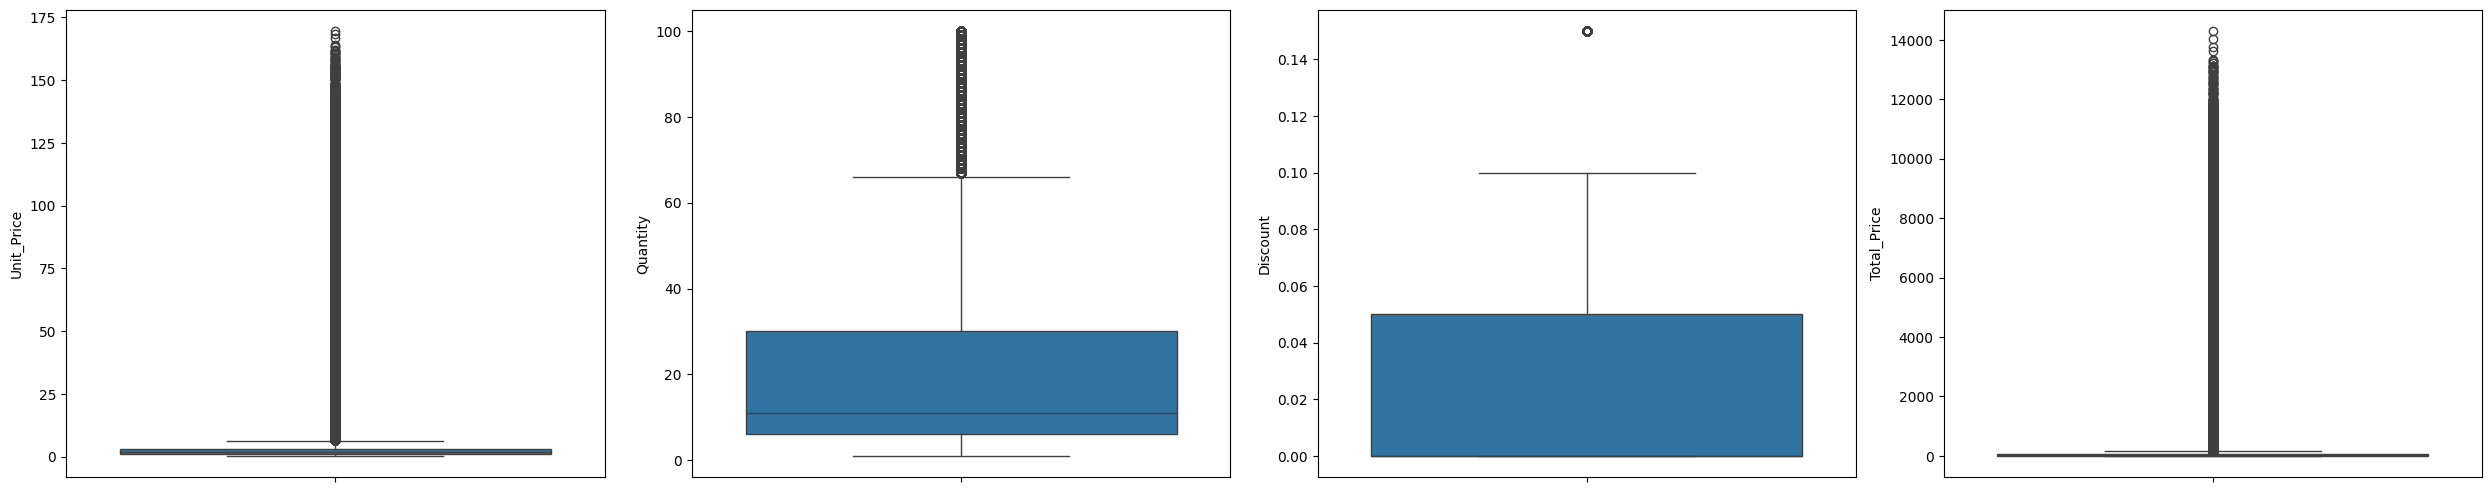

In [ ]:
out_col = ["Unit_Price", "Quantity", "Discount", "Total_Price" ]
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=df[col], data=df, ax=ax)
fig.tight_layout(pad=1)

In [ ]:
X_train = X_train[(X_train['Unit_Price'].between(X_train['Unit_Price'].quantile(0.25), X_train['Unit_Price'].quantile(0.75)))]


In [ ]:
X_train = X_train[(X_train['Total_Price'].between(X_train['Total_Price'].quantile(0.25), X_train['Total_Price'].quantile(0.75)))]

In [ ]:
label_encoder = LabelEncoder()
col = ["Customer_Type", "Product", "Category", "Region"]
for i in col:
  df[i] = pd.Series(label_encoder.fit_transform(df[i]))

label_encoderr = LabelEncoder()

In [ ]:
colums = ["Order_ID", "Customer_ID", "Order_Date"]
for i in colums:
        df.drop(columns=[i], inplace=True)


In [ ]:
df

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Sales,Month,Year
0,0,42,3,1.66,53,0.10,79.18,0,79.1820,8,2023
1,0,9,3,1.56,90,0.10,126.36,0,126.3600,8,2023
2,0,38,2,1.17,73,0.05,81.14,0,81.1395,8,2023
3,0,29,1,3.22,59,0.10,170.98,0,170.9820,8,2023
4,0,12,3,0.87,35,0.10,27.40,0,27.4050,8,2023
...,...,...,...,...,...,...,...,...,...,...,...
8999905,1,36,2,1.27,2,0.00,2.54,12,2.5400,7,2023
8999906,1,34,3,0.91,15,0.00,13.65,12,13.6500,7,2023
8999907,0,30,2,2.94,64,0.10,169.34,13,169.3440,4,2022
8999908,0,27,1,4.04,79,0.10,287.24,13,287.2440,4,2022


([<matplotlib.axis.YTick at 0x78cbdbcf6e10>,
 [Text(0, 0, 'Customer_Type'),
  Text(0, 1, 'Product'),
  Text(0, 2, 'Category'),
  Text(0, 3, 'Unit_Price'),
  Text(0, 4, 'Quantity'),
  Text(0, 5, 'Discount'),
  Text(0, 6, 'Total_Price'),
  Text(0, 7, 'Region'),
  Text(0, 8, 'Sales'),
  Text(0, 9, 'Month'),
  Text(0, 10, 'Year')])

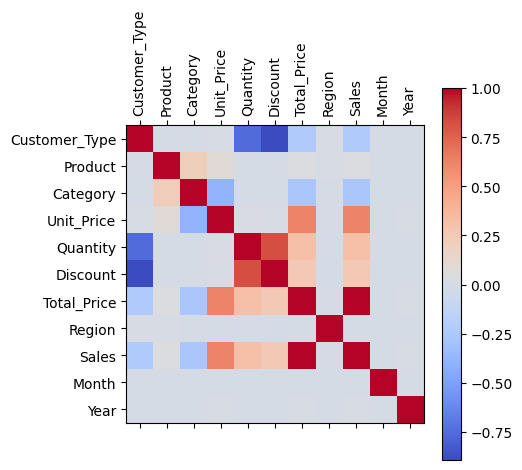

In [ ]:
cor_mat = X_train.corr()
plt.matshow(cor_mat, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(cor_mat)), cor_mat.columns, rotation=90)
plt.yticks(range(len(cor_mat)), cor_mat.columns)

In [ ]:
# С точки зрения бизнес аналитики, было бы логично предсказывать скидку, которую стоит дать тому или иному клиенту, чтобы он купил товар, но при этом и мы не продешевили
# Для этого можно искать либо скидку, либо total price, тк в итоговую цену скидка уже включена

# Также можно попробовать предсказывать customer_type или product, но в первом случаем по матрице видно,
# что все не очень хорошо, а во втором сллищком много категорий

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

In [ ]:
X = df.drop(columns=['Discount', 'Total_Price', 'Sales'])
y = df['Discount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.009615772769095608
MSE: 0.000306620757461404
RMSE: 0.01751058986617538


In [ ]:
from sklearn.tree import DecisionTreeClassifier
label_encoder = LabelEncoder()
col = ["Discount"]
for i in col:
  df[i] = pd.Series(label_encoder.fit_transform(df[i]))

label_encoderr = LabelEncoder()
X = df.drop(columns=['Discount', 'Total_Price', 'Sales'])
y = df['Discount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred =model.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score
pr = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
print(f"accur: {pr}")
print(f'prec: {prec}')
print(f'rec: {rec}')


accur: 0.8356939124946805
prec: 0.6036819401890597
rec: 0.605948159332881
